# Gavin Dormer - S2464806

# Assignment_2


Summary - As part of the Digital Shipbuilding Program at Babcock International there has been substantial investment within the Advanced Manufacturing Department. With the addition of a fully integrated PEMA Panel Line and five further feeder machines, ranging from state of the art Plate Profiling machines to CNC Pipe Benders. 

For this Assignment I have choosen to pull .csv files from the ESAB Plate Profiler. The ESAB is a critical asset machine and instrumental within the Advance Manufacturing platform. This machine feeds the Panel Line, Micro Panel Line and T-Beam machines. 

Currently we are going through a ramp up phase with regards to throughput. Throughput is measured by tonnes of steel cut in a given week. We are averaging 34 tonnes per week with a projected plan to cut 66 tonnes per week by March 2023. 

The ESAB is responsible for 85 percent of reported steel cut, to that end we must understand machine capacity, utilisation, uptime, downtime and bottle necks. With a particular focus on driving Nesting efficiencies, where and how can we improve nesting NC programs. 

With the tools this course has supplied, I have pulled four weeks worth of .csv files from the ESAB machine to investigate. 


# Step_1 Import Python Libraries and Data Set 

In [62]:
# Importing Python Libraries

import pandas as pd 
import numpy as np

# Providing instruction to display all coulumns

pd.set_option('display.max_columns', None)


In [63]:
# Importing ESAB_Production_Outputs data set

ESAB_df = pd.read_csv('ESAB_Production_Outputs.csv')

# Taking an initial look at the data set

ESAB_df.head()


,Source.Name,ProgramName,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,Process2Time,Process2Length,Process2Starts,Process3Time,Process3Length,Process3Starts,Process4Time,Process4Length,Process4Starts,RapidTime,RapidLength,RapidStarts
0,20221012_VisionT5.CSV,00001455,10/12/2022 1:24:33 AM,10/12/2022 1:24:45 AM,True,0,0,1,0,0.00000,0,0,0.0,0,0,0,0,0,0,0,0,0,0
1,20221012_VisionT5.CSV,00001455,10/12/2022 1:27:30 AM,10/12/2022 1:54:01 AM,False,1589,21,5,997,40129.87109,60,0,0.0,0,0,0,0,0,0,0,65,7330,62
2,20221012_VisionT5.CSV,00002333,10/12/2022 2:30:39 AM,10/12/2022 2:52:44 AM,False,1320,179,4,653,18664.89844,25,0,0.0,0,0,0,0,0,0,0,94,15470,43
3,20221012_VisionT5.CSV,00001610,10/12/2022 5:33:15 AM,10/12/2022 5:56:28 AM,True,1388,9,3,0,0.00000,0,0,0.0,0,0,0,0,0,0,0,548,123159,92
4,20221012_VisionT5.CSV,00001610,10/12/2022 5:58:16 AM,10/12/2022 5:58:34 AM,True,14,11,2,0,0.00000,0,0,0.0,0,0,0,0,0,0,0,0,0,0


# Step_2 Create a DeepCopy

In [64]:
# Import Python copy function & deepcopy function within copy

import copy
from copy import deepcopy

In [65]:
# Create a deepcopy of ESAB_Production_Outputs data set

ESAB_df = ESAB_df.copy()

# Step_3 Clean Data & Investigate Data Size

In [66]:
# Display header of each column

ESAB_df.columns

Index(['Source.Name', 'ProgramName', 'Start', 'End', 'Cancelled', 'TotalTime',
       'BreakingTime', 'NumberBreaks', 'Process1Time', 'Process1Length',
       'Process1Starts', 'Process2Time', 'Process2Length', 'Process2Starts',
       'Process3Time', 'Process3Length', 'Process3Starts', 'Process4Time',
       'Process4Length', 'Process4Starts', 'RapidTime', 'RapidLength',
       'RapidStarts'],
      dtype='object')

In [67]:
# Use this argument to measure the size of this data set
# In this case we have 23 columns and 605 rows 

ESAB_df.shape 

(605, 23)

In [68]:
# Below I'm removing columns that do not contain valuable or usable data

ESAB_df.drop(columns=['Source.Name', 'Process2Time', 'Process2Length', 'Process2Starts', 'Process3Time', 'Process3Length', 'Process3Starts', 'Process4Time', 'Process4Length', 'Process4Starts'], inplace=True)


In [69]:
# Establishing above change was successful

ESAB_df.columns

Index(['ProgramName', 'Start', 'End', 'Cancelled', 'TotalTime', 'BreakingTime',
       'NumberBreaks', 'Process1Time', 'Process1Length', 'Process1Starts',
       'RapidTime', 'RapidLength', 'RapidStarts'],
      dtype='object')

In [70]:
# Now taking another look at the data set post dropping unwanted columns
# From this view we can establish that in the 'ProgramName' column we have duplicated Program ID's

ESAB_df.head()

,ProgramName,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
0,00001455,10/12/2022 1:24:33 AM,10/12/2022 1:24:45 AM,True,0,0,1,0,0.00000,0,0,0,0
1,00001455,10/12/2022 1:27:30 AM,10/12/2022 1:54:01 AM,False,1589,21,5,997,40129.87109,60,65,7330,62
2,00002333,10/12/2022 2:30:39 AM,10/12/2022 2:52:44 AM,False,1320,179,4,653,18664.89844,25,94,15470,43
3,00001610,10/12/2022 5:33:15 AM,10/12/2022 5:56:28 AM,True,1388,9,3,0,0.00000,0,548,123159,92
4,00001610,10/12/2022 5:58:16 AM,10/12/2022 5:58:34 AM,True,14,11,2,0,0.00000,0,0,0,0


In [71]:
# The column header 'ProgramName' contains the Nest numbers produced by the Nesting CAM system we use
# Every Nest created has a unique Nesting ID
# Nest ID = 'ProgramNumber'
# Using below argument to identify duplicated Program ID's throughout the entire data set

ESAB_df.duplicated(subset=['ProgramName', ])

0      False
1       True
2      False
3      False
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32     False
33     False
34     False
35     False
36     False
37     False
38      True
39     False
40      True
41     False
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50     False
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59      True
60      True
61      True
62      True
63     False
64     False
65      True
66      True
67      True
68      True
69      True
70     False
71      True
72     False
73      True
74      True
75     False
76      True

In [72]:
# Now using below code to numerically quantify the volume of duplictaed Program ID's
# This code has indicated that we have 427 duplicated Program ID's

ESAB_df.duplicated(subset=['ProgramName', ]).sum()

427

In [73]:
# Using below argument to allow the viewing of all rows
# All rows can now be viewed by using the scrolling function within the desired window 

pd.set_option('display.max_rows', ESAB_df.shape[0]+1)

In [74]:
# Now that we have identified that we have 427 duplicated Program ID's we can go ahead and delete all duplications
# Using the .drop function allows us to delete duplications
#'Keep First' argument provides instruction to keep the first instance of Program ID and delete all subsequent duplications 

ESAB_df = ESAB_df.drop_duplicates(subset='ProgramName', keep="first")

# Taking a look at the data set to establish if the duplication deletion has been successful
# Below confirms it has worked

ESAB_df

,ProgramName,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
0,00001455,10/12/2022 1:24:33 AM,10/12/2022 1:24:45 AM,True,0,0,1,0,0.000000,0,0,0,0
2,00002333,10/12/2022 2:30:39 AM,10/12/2022 2:52:44 AM,False,1320,179,4,653,18664.898440,25,94,15470,43
3,00001610,10/12/2022 5:33:15 AM,10/12/2022 5:56:28 AM,True,1388,9,3,0,0.000000,0,548,123159,92
32,00001278,10/12/2022 8:45:34 AM,10/12/2022 1:58:21 PM,False,18766,4663,99,6813,274077.718800,259,2172,277483,898
33,00001339,10/12/2022 4:13:48 PM,10/12/2022 11:40:24 PM,False,26794,17653,29,4200,178037.156300,173,1328,252707,454
34,AA Module0003 240 X 90,10/13/2022 2:18:29 AM,10/13/2022 2:20:46 AM,False,135,46,1,61,1113.364136,2,3,355,2
35,AA Module0003 205 x 50,10/13/2022 2:27:17 AM,10/13/2022 2:28:54 AM,False,96,22,2,46,849.383606,2,3,289,2
36,AA Module0003 220 X 60,10/13/2022 2:34:31 AM,10/13/2022 2:36:12 AM,False,100,21,2,51,927.834900,2,3,317,2
37,AA Module0001 155,10/13/2022 3:54:29 AM,10/13/2022 3:55:11 AM,True,0,0,0,0,0.000000,0,0,0,0
39,00001284,10/13/2022 5:38:52 AM,10/13/2022 5:38:59 AM,True,0,0,1,0,0.000000,0,0,0,0


In [75]:
# Use this argument to measure the size of this data set
# In this case we have 13 columns and 178 rows
# This is now a significantly reduced data set size

ESAB_df.shape

(178, 13)

In [76]:
# Now I want to investigate the 'Cancelled' column
# The cancelled column instructs if the NC Program was successfully ran or aborted/cancelled 
# This action is conducted by the ESAB machine Operator
# Programs can be cancelled for multiple reasons
# Cancelled Programs are of no use, to that end they must be deleted

ESAB_df['Cancelled']

0       True
2      False
3       True
32     False
33     False
34     False
35     False
36     False
37      True
39      True
41      True
50      True
63     False
64     False
70      True
72      True
75     False
77     False
78     False
79      True
80     False
85      True
87     False
88      True
97     False
98     False
99     False
105     True
114     True
115    False
116    False
117    False
118    False
119    False
124    False
125    False
126    False
127    False
128     True
132    False
137    False
138    False
139    False
142    False
143    False
144    False
146    False
149     True
152     True
154     True
155    False
156     True
163    False
164    False
165     True
167     True
172    False
173    False
179     True
182     True
187     True
189     True
191    False
192    False
193    False
194     True
196    False
197     True
203     True
223     True
226    False
228     True
233     True
234    False
245    False
253     True
259    False

In [77]:
# Again using the .drop command to delete all cancelled Programs
# In above cell you can see the list with each line containing a True or False statement 
# True = Program was cancelled 
# False = Program was executed successfully 
# Now we delete all True statements 

ESAB_df.drop([0,3,37,39,41,50,70,72,79,85,88,105,114,128,149,152,154,156,165,167,179,182,187,189,194,197,203,223,228,233,253,273,299,308,315,335,343,356,361,368,385,402,428,432,434,448,453,456,466,480,481,489,506,530,537,545,551,555,585,596,599,600],axis=0,inplace=True)

In [78]:
# Checking the data shape to ensure the above .drop command has been successfull
# The data shape has changed in size 
# Columns remain unchanged but rows has reduced in size, this is what I would expect to see
# from comparing previous data shape to this data shape we can establish that 62 cancelled Programs have been deleted 

ESAB_df.shape

(116, 13)

In [79]:
# Now I want to investigate the 'ProgramName' column
# This time not for duplications but for Program ID's that are not generated by our CAM software
# By scrolling through below list you can easily identify Program ID's that do not conform to auto generated CAM ID's
# Program ID's that do not follow the same name stucture have been self generated programs by the ESAB Operator
# Non CAM generated Programs are not wanted for this study

ESAB_df['ProgramName']

2                        00002333
32                       00001278
33                       00001339
34         AA Module0003 240 X 90
35         AA Module0003 205 x 50
36         AA Module0003 220 X 60
63                       00001291
64                       00001273
75                       00002404
77                       00001323
78                       00001326
80                       00002312
87                       00001350
97                       00001312
98                       00001311
99                       00001318
115                      00001812
116      aa Module0006 2900 X 100
117       AA Module0082 400 X 120
118                      00001330
119                      00001327
124                      00001259
125                      00002402
126                      00002218
127                      00002230
132       aaaModule0003 360x60 id
137                      00002398
138                      00002202
139                      00002401
142           

In [80]:
# As before we can use the same technique to delete unwanted Program ID's

ESAB_df.drop([34,35,36,116,117,132,196,265,317,354,359,360,421,423,470,501,514,534,565,581],axis=0,inplace=True)

In [81]:
# Once again usung the .shape function we can establish if the above .drop function has been successful
# We can tell by the shape it has been successful 
# We have maintained the same number of columns but reduced the number of cells by a further 20

ESAB_df.shape

(96, 13)

In [82]:
# We continue to investigate, work through and clean columns 
# This time we look at 'BreakingTime' column
# 'BreakingTime' is the time allocated to removing finished cut parts from the machine bed
# This can range from only a few seconds for one large rectangular part to several hours for a very busy and intricate Nest
# 'BreakingTimes' are measured in seconds
# For example 30 minutes = 1800 seconds 
# In this case there are no spurious values to be concerned about

ESAB_df['BreakingTime']

2        179
32      4663
33     17653
63       192
64       345
75         6
77        13
78         1
80     41391
87       802
97         5
98         1
99         5
115     8357
118      117
119    15578
124     1082
125      544
126        4
127        6
137       14
138        2
139      198
142        2
143     2876
144       42
146    15587
155       75
163       60
164     3046
172       17
173        1
191        1
192     3232
193      127
226      914
234     7905
245      152
259       64
261     2447
262     2730
267       42
269        3
270     7543
282        5
294        3
337        1
338       19
339     4386
348       15
350      234
352     1349
353        4
437     8730
438       12
447      284
469     3584
477      499
487      201
488     2084
491       15
492     3566
524     2207
525       68
526      537
527       36
528        6
531     1454
535      104
539     3266
548     1575
549     4987
550      191
553      122
554      195
558      247
560      142

In [83]:
# Further column investigation continues 
# 'Process1Time' is the time duration of the Plasma Cutting Torch
# Again this time is presented in seconds
# In this column we can identify two rows with spurious data
# To build an accurate Production picture these rows must be deleted 

ESAB_df['Process1Time']

2       653
32     6813
33     4200
63      717
64       89
75      401
77      192
78      208
80     1485
87     4334
97      641
98      636
99      745
115    8196
118    2493
119     294
124    2496
125    1137
126     301
127     529
137     716
138     383
139     173
142     552
143     894
144     879
146     978
155     216
163      60
164    1446
172      56
173      94
191      85
192    3674
193    1936
226     809
234    5317
245     313
259     300
261    2561
262    2572
267    1401
269     388
270    2185
282     516
294     308
337     642
338     650
339    3598
348      92
350      36
352    3261
353     139
437    9566
438     756
447    1982
469    2265
477     324
487     190
488     490
491     529
492    2786
524     147
525     306
526     975
527     630
528     393
531       0
535    3244
539     562
548       0
549    4258
550     705
553    3011
554    1778
558    1170
560    3435
563    3043
566    2568
569     796
570     414
571    7934
573    1804
574 

In [84]:
# As before I'm using the .drop command to delete unwanted rows

ESAB_df.drop([531,548],axis=0,inplace=True)

In [85]:
# Now checking data set shape to ensure above actions have been successful
# The data set shape has changed in size, confirming success
# Comparing data set shapes we can derive that two rows have been deleted 

ESAB_df.shape

(94, 13)

In [86]:
# Now we check the 'ProcessLength' column
# 'ProcessLength' is the linear length travelled by the Plasma Cutting Torch whilst physically cutting 
# Again this can range vastly from Nest to Nest depending on size, geometry and complexity
# Linear length travelled whilst cutting is measured in mm
# For example 275000mm = 275 meters 
# In this case there are no spurious values to be concerned about

ESAB_df['Process1Length']

2       18664.898440
32     274077.718800
33     178037.156300
63      44519.761720
64       3614.934814
75      12278.865230
77       8263.230469
78       8899.686523
80      51794.968750
87      96310.320310
97      32023.628910
98      31810.833980
99      37228.230470
115    279085.531300
118     80793.156250
119     12513.748050
124     41293.347660
125     38714.472660
126     17229.570310
127     14076.221680
137     24351.582030
138     13060.771480
139      4594.908203
142     14684.051760
143     32318.404300
144     28775.265630
146     23695.878910
155      3598.983154
163      1643.184448
164     60134.394530
172      2439.212402
173      2716.450439
191      2852.232910
192    157820.859400
193     62231.777340
226     46701.199220
234    210914.343800
245     17700.167970
259     18854.306640
261    125131.531300
262    131520.484400
267     47197.011720
269     24451.552730
270    129980.695300
282     26122.339840
294     15774.069340
337     29938.621090
338     23094

In [87]:
# Lastly we investigate the 'RapidLength' column
# 'RapidLength' is the linear length travelled by the Plasma Cutting Torch whilst in fresh air 
# This is all linear movements made above the plate whilst the Plasma Torch is not cutting
# Generally we call such moves 'link moves'
# Again this can range vastly from Nest to Nest depending on Nest size and geometry
# Linear length travelled whilst NOT cutting is measured in mm
# For example 275000mm = 275 meters 
# In this case there are no spurious values to be concerned about

ESAB_df['RapidLength']

2       15470
32     277483
33     252707
63     113057
64      53480
75      10991
77      10807
78       7936
80      47455
87     178575
97      44560
98      36584
99      44754
115    269108
118     38362
119     77895
124     60698
125     27116
126     23947
127     21282
137     14062
138     20051
139      6300
142      8930
143     23218
144     45578
146     33060
155      4874
163      2711
164     74215
172      1917
173      1047
191      1242
192    181664
193    103201
226    119855
234    154402
245     16181
259     51597
261    223813
262    145729
267     27490
269     55031
270     99365
282     21708
294     12430
337      6074
338     33166
339    159712
348      3550
350      4610
352     18112
353      3405
437    534505
438     81866
447     17448
469    191046
477     32157
487     22229
488     52007
491    200731
492    277842
524     41620
525     19094
526     28203
527     47489
528     24410
535    158733
539     17963
549    188830
550     38795
553   

In [88]:
# Taking another quick view of the data set, it is usfull to do this every so often to ensure all is looking as expected

ESAB_df.head() 

,ProgramName,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
2,00002333,10/12/2022 2:30:39 AM,10/12/2022 2:52:44 AM,False,1320,179,4,653,18664.898440,25,94,15470,43
32,00001278,10/12/2022 8:45:34 AM,10/12/2022 1:58:21 PM,False,18766,4663,99,6813,274077.718800,259,2172,277483,898
33,00001339,10/12/2022 4:13:48 PM,10/12/2022 11:40:24 PM,False,26794,17653,29,4200,178037.156300,173,1328,252707,454
63,00001291,10/13/2022 10:31:35 AM,10/13/2022 11:17:33 AM,False,2756,192,5,717,44519.761720,32,534,113057,122
64,00001273,10/13/2022 1:10:52 PM,10/13/2022 1:46:34 PM,False,2141,345,12,89,3614.934814,9,509,53480,217


In [89]:
# Using below argument to view the Index under 'ProgramName' heading

ESAB_df.set_index('ProgramName' , )

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00002333,10/12/2022 2:30:39 AM,10/12/2022 2:52:44 AM,False,1320,179,4,653,18664.898440,25,94,15470,43
00001278,10/12/2022 8:45:34 AM,10/12/2022 1:58:21 PM,False,18766,4663,99,6813,274077.718800,259,2172,277483,898
00001339,10/12/2022 4:13:48 PM,10/12/2022 11:40:24 PM,False,26794,17653,29,4200,178037.156300,173,1328,252707,454
00001291,10/13/2022 10:31:35 AM,10/13/2022 11:17:33 AM,False,2756,192,5,717,44519.761720,32,534,113057,122
00001273,10/13/2022 1:10:52 PM,10/13/2022 1:46:34 PM,False,2141,345,12,89,3614.934814,9,509,53480,217
00002404,10/14/2022 4:30:54 AM,10/14/2022 4:40:59 AM,False,603,6,3,401,12278.865230,4,41,10991,7
00001323,10/14/2022 5:29:17 AM,10/14/2022 5:38:48 AM,False,566,13,3,192,8263.230469,5,69,10807,28
00001326,10/14/2022 5:56:41 AM,10/14/2022 6:07:12 AM,False,630,1,1,208,8899.686523,14,63,7936,40
00002312,10/14/2022 7:03:57 AM,10/14/2022 7:07:53 PM,False,43431,41391,19,1485,51794.968750,15,205,47455,42


In [90]:
# Now confirming above action and setting the Index as 'ProgramName'

ESAB_df.set_index('ProgramName', inplace = True) 

# Taking another look at data set and ensuring changes are active
# I can confirm from below this has been successful

ESAB_df.head()

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00002333,10/12/2022 2:30:39 AM,10/12/2022 2:52:44 AM,False,1320,179,4,653,18664.898440,25,94,15470,43
00001278,10/12/2022 8:45:34 AM,10/12/2022 1:58:21 PM,False,18766,4663,99,6813,274077.718800,259,2172,277483,898
00001339,10/12/2022 4:13:48 PM,10/12/2022 11:40:24 PM,False,26794,17653,29,4200,178037.156300,173,1328,252707,454
00001291,10/13/2022 10:31:35 AM,10/13/2022 11:17:33 AM,False,2756,192,5,717,44519.761720,32,534,113057,122
00001273,10/13/2022 1:10:52 PM,10/13/2022 1:46:34 PM,False,2141,345,12,89,3614.934814,9,509,53480,217


# Step_4 Summary of Size and Shape of Data Set 

In [91]:
# Use .describe argument to display Stats on the data set

ESAB_df.describe()

,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,5187.031915,2122.159574,15.074468,1471.319149,55149.867366,54.191489,429.606383,72721.957447,161.872340
std,7776.964222,5476.911849,33.561127,1874.617020,68321.797384,99.450888,608.260542,87013.459875,269.215237
min,182.000000,1.000000,1.000000,10.000000,214.265747,1.000000,9.000000,855.000000,3.000000
25%,758.500000,14.250000,3.000000,306.500000,13324.922365,6.250000,67.500000,16497.750000,14.250000
50%,1600.500000,142.000000,6.000000,704.500000,30499.034180,14.500000,194.000000,40207.500000,55.500000
75%,5916.750000,1900.250000,11.750000,2134.250000,62093.636715,59.750000,525.500000,102242.000000,207.000000
max,43431.000000,41391.000000,261.000000,9566.000000,327880.500000,767.000000,3843.000000,534505.000000,1895.000000


In [92]:
# Display comprehensive evaluation of dataset, (memory usage, number of columns, data types etc)

ESAB_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 00002333 to 00002340
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Start           94 non-null     object 
 1   End             94 non-null     object 
 2   Cancelled       94 non-null     bool   
 3   TotalTime       94 non-null     int64  
 4   BreakingTime    94 non-null     int64  
 5   NumberBreaks    94 non-null     int64  
 6   Process1Time    94 non-null     int64  
 7   Process1Length  94 non-null     float64
 8   Process1Starts  94 non-null     int64  
 9   RapidTime       94 non-null     int64  
 10  RapidLength     94 non-null     int64  
 11  RapidStarts     94 non-null     int64  
dtypes: bool(1), float64(1), int64(8), object(2)
memory usage: 8.9+ KB


# Step_5 Convert data types to integers 

In [93]:
# We want to convert data types to integers
# First we convert data types to float before changing to integers, this is a Python quirk 

ESAB_df = ESAB_df.astype(float, errors='ignore')
ESAB_df.dtypes

Start              object
End                object
Cancelled         float64
TotalTime         float64
BreakingTime      float64
NumberBreaks      float64
Process1Time      float64
Process1Length    float64
Process1Starts    float64
RapidTime         float64
RapidLength       float64
RapidStarts       float64
dtype: object

In [94]:
# Now we can convert from float to integers 

ESAB_df = ESAB_df.astype(int, errors='ignore')
ESAB_df.dtypes

Start             object
End               object
Cancelled          int64
TotalTime          int64
BreakingTime       int64
NumberBreaks       int64
Process1Time       int64
Process1Length     int64
Process1Starts     int64
RapidTime          int64
RapidLength        int64
RapidStarts        int64
dtype: object

# Step_6 Data Analysis

In [95]:
# Now we want to start analysing the cleaned data 
# Lets look at the columns that supply valuable information
# The most valuable columns for this investigation are....
#                                                        'TotalTime'
#                                                        'BreakingTime'
#                                                        'Process1Time'
#                                                        'Process1Length' 
#                                                        'RapidLength'

#Each of these columns and the info they provide are described in detail earlier on in this Assignment 

# Use the .sort command to list 'TotalTime'
# 'TotalTime' is the Program run time from Start to Finsh, measured in seconds
# Values are displayed below in numerical and ascending order 

ESAB_df.sort_values('TotalTime')

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00001281,10/21/2022 3:45:17 AM,10/21/2022 3:48:20 AM,0,182,1,2,85,2852,12,11,1242,12
00002649,11/11/2022 6:00:19 AM,11/11/2022 6:03:27 AM,0,183,1,2,64,2761,5,9,855,8
00002641,11/11/2022 6:42:02 AM,11/11/2022 6:45:28 AM,0,203,1,1,30,2113,4,23,2480,13
00001287,10/20/2022 11:24:33 AM,10/20/2022 11:28:03 AM,0,207,17,7,56,2439,2,18,1917,9
00001285,10/20/2022 11:44:57 AM,10/20/2022 11:48:49 AM,0,231,1,1,94,2716,7,15,1047,10
00002662,11/11/2022 7:52:45 AM,11/11/2022 7:56:46 AM,0,237,112,3,10,214,2,16,1412,8
00002390,10/20/2022 6:09:24 AM,10/20/2022 6:14:55 AM,0,325,60,8,60,1643,8,27,2711,16
00002644,11/11/2022 6:10:50 AM,11/11/2022 6:16:46 AM,0,351,17,3,81,3065,5,33,2984,23
00002664,11/11/2022 8:10:54 AM,11/11/2022 8:17:34 AM,0,395,8,2,181,6508,6,49,7971,18


In [96]:
# Again using .sort command to list 'BreakingTimes' in the same order and fashion as above cell

ESAB_df.sort_values('BreakingTime')

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00002422,10/26/2022 11:18:32 PM,10/26/2022 11:32:35 PM,0,838,1,1,642,29938,6,32,6074,7
00001281,10/21/2022 3:45:17 AM,10/21/2022 3:48:20 AM,0,182,1,2,85,2852,12,11,1242,12
00001311,10/17/2022 4:04:02 PM,10/17/2022 4:17:40 PM,0,814,1,1,636,31810,2,103,36584,4
00001326,10/14/2022 5:56:41 AM,10/14/2022 6:07:12 AM,0,630,1,1,208,8899,14,63,7936,40
00001285,10/20/2022 11:44:57 AM,10/20/2022 11:48:49 AM,0,231,1,1,94,2716,7,15,1047,10
00002649,11/11/2022 6:00:19 AM,11/11/2022 6:03:27 AM,0,183,1,2,64,2761,5,9,855,8
00002641,11/11/2022 6:42:02 AM,11/11/2022 6:45:28 AM,0,203,1,1,30,2113,4,23,2480,13
00002202,10/19/2022 6:01:44 AM,10/19/2022 6:19:19 AM,0,1049,2,1,383,13060,32,165,20051,74
00002400,10/19/2022 11:35:54 AM,10/19/2022 11:48:10 AM,0,734,2,1,552,14684,5,38,8930,10


In [97]:
# Now we look at 'Process1Time' in the same order and fashion as above cell

ESAB_df.sort_values('Process1Time')

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00002662,11/11/2022 7:52:45 AM,11/11/2022 7:56:46 AM,0,237,112,3,10,214,2,16,1412,8
00002641,11/11/2022 6:42:02 AM,11/11/2022 6:45:28 AM,0,203,1,1,30,2113,4,23,2480,13
00002378,10/27/2022 6:13:44 AM,10/27/2022 6:24:42 AM,0,655,234,7,36,2144,27,39,4610,29
00001287,10/20/2022 11:24:33 AM,10/20/2022 11:28:03 AM,0,207,17,7,56,2439,2,18,1917,9
00002390,10/20/2022 6:09:24 AM,10/20/2022 6:14:55 AM,0,325,60,8,60,1643,8,27,2711,16
00002649,11/11/2022 6:00:19 AM,11/11/2022 6:03:27 AM,0,183,1,2,64,2761,5,9,855,8
00002340,11/11/2022 11:46:12 AM,11/11/2022 12:01:33 PM,0,920,198,10,73,2661,6,195,36134,100
00002644,11/11/2022 6:10:50 AM,11/11/2022 6:16:46 AM,0,351,17,3,81,3065,5,33,2984,23
00001281,10/21/2022 3:45:17 AM,10/21/2022 3:48:20 AM,0,182,1,2,85,2852,12,11,1242,12


In [98]:
# This time we look at 'Process1Length' 
# Note, the measurment is displayed in mm
# Again this is listed in ascending order

ESAB_df.sort_values('Process1Length') 

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00002662,11/11/2022 7:52:45 AM,11/11/2022 7:56:46 AM,0,237,112,3,10,214,2,16,1412,8
00002390,10/20/2022 6:09:24 AM,10/20/2022 6:14:55 AM,0,325,60,8,60,1643,8,27,2711,16
00002641,11/11/2022 6:42:02 AM,11/11/2022 6:45:28 AM,0,203,1,1,30,2113,4,23,2480,13
00002378,10/27/2022 6:13:44 AM,10/27/2022 6:24:42 AM,0,655,234,7,36,2144,27,39,4610,29
00001287,10/20/2022 11:24:33 AM,10/20/2022 11:28:03 AM,0,207,17,7,56,2439,2,18,1917,9
00002340,11/11/2022 11:46:12 AM,11/11/2022 12:01:33 PM,0,920,198,10,73,2661,6,195,36134,100
00001285,10/20/2022 11:44:57 AM,10/20/2022 11:48:49 AM,0,231,1,1,94,2716,7,15,1047,10
00002649,11/11/2022 6:00:19 AM,11/11/2022 6:03:27 AM,0,183,1,2,64,2761,5,9,855,8
00001281,10/21/2022 3:45:17 AM,10/21/2022 3:48:20 AM,0,182,1,2,85,2852,12,11,1242,12


In [99]:
# Lastly we look at 'RapidLength'
# Again Units are displayed in mm
# Again, values are listed in ascending order

ESAB_df.sort_values('RapidLength')

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00002649,11/11/2022 6:00:19 AM,11/11/2022 6:03:27 AM,0,183,1,2,64,2761,5,9,855,8
00001285,10/20/2022 11:44:57 AM,10/20/2022 11:48:49 AM,0,231,1,1,94,2716,7,15,1047,10
00001281,10/21/2022 3:45:17 AM,10/21/2022 3:48:20 AM,0,182,1,2,85,2852,12,11,1242,12
00002662,11/11/2022 7:52:45 AM,11/11/2022 7:56:46 AM,0,237,112,3,10,214,2,16,1412,8
00001287,10/20/2022 11:24:33 AM,10/20/2022 11:28:03 AM,0,207,17,7,56,2439,2,18,1917,9
00002641,11/11/2022 6:42:02 AM,11/11/2022 6:45:28 AM,0,203,1,1,30,2113,4,23,2480,13
00002390,10/20/2022 6:09:24 AM,10/20/2022 6:14:55 AM,0,325,60,8,60,1643,8,27,2711,16
00002644,11/11/2022 6:10:50 AM,11/11/2022 6:16:46 AM,0,351,17,3,81,3065,5,33,2984,23
00002421,10/27/2022 8:15:27 AM,10/27/2022 8:25:49 AM,0,617,4,1,139,6569,41,47,3405,42


In [100]:
# Now I want to focus on the top 5 Programs in terms of longst 'run time',
#                                                            'breaking time'
#                                                      'plasma torch cutting time' 
#                                            'plasma torch distance travelled whilst cutting'
#                                          'plasma torch distance travelled whilst NOT cutting'

# First we will look at 'TotalTime'
# We can use below argument to numerically list the top 5 values
# .nlargest displays values in descending order
# Units displayed in seconds
    
ESAB_df.nlargest(n=5, columns=['TotalTime'])

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00002312,10/14/2022 7:03:57 AM,10/14/2022 7:07:53 PM,0,43431,41391,19,1485,51794,15,205,47455,42
00001957,10/30/2022 11:42:28 PM,10/31/2022 8:49:09 AM,0,32799,8730,146,9566,327880,767,3843,534505,1895
00001884,11/9/2022 3:35:42 PM,11/9/2022 11:25:11 PM,0,28168,16016,83,7934,262686,330,867,108651,533
00001339,10/12/2022 4:13:48 PM,10/12/2022 11:40:24 PM,0,26794,17653,29,4200,178037,173,1328,252707,454
00001812,10/18/2022 1:07:28 AM,10/18/2022 7:54:20 AM,0,24407,8357,261,8196,279085,268,2363,269108,1020


In [101]:
# Using same technique as above cell but for 'BreakingTime'
# Units displayed in seconds

ESAB_df.nlargest(n=5, columns=['BreakingTime'])

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00002312,10/14/2022 7:03:57 AM,10/14/2022 7:07:53 PM,0,43431,41391,19,1485,51794,15,205,47455,42
00001339,10/12/2022 4:13:48 PM,10/12/2022 11:40:24 PM,0,26794,17653,29,4200,178037,173,1328,252707,454
00001884,11/9/2022 3:35:42 PM,11/9/2022 11:25:11 PM,0,28168,16016,83,7934,262686,330,867,108651,533
00001663,10/19/2022 4:59:45 PM,10/19/2022 10:06:38 PM,0,18411,15587,20,978,23695,32,425,33060,250
00001327,10/18/2022 4:57:20 PM,10/18/2022 9:39:04 PM,0,16903,15578,5,294,12513,3,346,77895,55


In [102]:
# Again as above but for 'ProcessTime'
# Units displayed in seconds

ESAB_df.nlargest(n=5, columns=['Process1Time'])

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00001957,10/30/2022 11:42:28 PM,10/31/2022 8:49:09 AM,0,32799,8730,146,9566,327880,767,3843,534505,1895
00001812,10/18/2022 1:07:28 AM,10/18/2022 7:54:20 AM,0,24407,8357,261,8196,279085,268,2363,269108,1020
00001884,11/9/2022 3:35:42 PM,11/9/2022 11:25:11 PM,0,28168,16016,83,7934,262686,330,867,108651,533
00001278,10/12/2022 8:45:34 AM,10/12/2022 1:58:21 PM,0,18766,4663,99,6813,274077,259,2172,277483,898
00001640,10/24/2022 3:49:23 PM,10/24/2022 8:33:41 PM,0,17052,7905,29,5317,210914,101,1246,154402,537


In [103]:
# And now for 'Process1Length'
# Units are now displayed in mm

ESAB_df.nlargest(n=5, columns=['Process1Length'])

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00001957,10/30/2022 11:42:28 PM,10/31/2022 8:49:09 AM,0,32799,8730,146,9566,327880,767,3843,534505,1895
00001812,10/18/2022 1:07:28 AM,10/18/2022 7:54:20 AM,0,24407,8357,261,8196,279085,268,2363,269108,1020
00001278,10/12/2022 8:45:34 AM,10/12/2022 1:58:21 PM,0,18766,4663,99,6813,274077,259,2172,277483,898
00001884,11/9/2022 3:35:42 PM,11/9/2022 11:25:11 PM,0,28168,16016,83,7934,262686,330,867,108651,533
00001640,10/24/2022 3:49:23 PM,10/24/2022 8:33:41 PM,0,17052,7905,29,5317,210914,101,1246,154402,537


In [104]:
# Lastly we look at 'RapidLength'
# As above Units are displayed in mm

ESAB_df.nlargest(n=5, columns=['RapidLength'])

,Start,End,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
ProgramName,,,,,,,,,,,,
00001957,10/30/2022 11:42:28 PM,10/31/2022 8:49:09 AM,0,32799,8730,146,9566,327880,767,3843,534505,1895
00002021,11/3/2022 6:43:26 AM,11/3/2022 10:08:31 AM,0,12303,3566,30,2786,111801,146,2193,277842,526
00001278,10/12/2022 8:45:34 AM,10/12/2022 1:58:21 PM,0,18766,4663,99,6813,274077,259,2172,277483,898
00001812,10/18/2022 1:07:28 AM,10/18/2022 7:54:20 AM,0,24407,8357,261,8196,279085,268,2363,269108,1020
00001339,10/12/2022 4:13:48 PM,10/12/2022 11:40:24 PM,0,26794,17653,29,4200,178037,173,1328,252707,454


In [105]:
# This provides a breakdown of parts and their relative usage

count = []
for column in ESAB_df:
    print(ESAB_df[column].value_counts())                                    

10/12/2022 2:30:39 AM     1
11/2/2022 11:58:14 PM     1
11/7/2022 12:03:05 PM     1
11/7/2022 9:05:37 AM      1
11/4/2022 5:10:53 AM      1
11/4/2022 4:39:55 AM      1
11/4/2022 1:26:14 AM      1
11/4/2022 1:08:24 AM      1
11/4/2022 12:01:51 AM     1
11/3/2022 6:43:26 AM      1
11/3/2022 4:53:02 AM      1
11/2/2022 10:04:07 PM     1
11/8/2022 5:00:43 AM      1
11/2/2022 11:06:57 AM     1
11/2/2022 2:02:40 AM      1
10/31/2022 7:45:21 PM     1
10/31/2022 2:53:24 PM     1
10/30/2022 11:42:28 PM    1
10/27/2022 8:15:27 AM     1
10/27/2022 6:28:58 AM     1
10/27/2022 6:13:44 AM     1
10/27/2022 5:53:50 AM     1
11/7/2022 11:36:58 PM     1
11/8/2022 7:49:07 AM      1
10/12/2022 8:45:34 AM     1
11/10/2022 5:43:58 AM     1
11/11/2022 8:10:54 AM     1
11/11/2022 7:52:45 AM     1
11/11/2022 6:42:02 AM     1
11/11/2022 6:10:50 AM     1
11/11/2022 6:00:19 AM     1
11/11/2022 2:00:55 AM     1
11/10/2022 9:43:41 PM     1
11/10/2022 10:48:00 AM    1
11/10/2022 6:35:03 AM     1
11/10/2022 5:00:55 A

# Step_7 Data Visualisation

In [106]:
# Fisrt we must import libraries to aid in data visualisation

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns



In [107]:
# Below .corr argument used to display correlation
# Column headers are presented in a matrix along X and Y Axis

ESAB_df.corr()

,Cancelled,TotalTime,BreakingTime,NumberBreaks,Process1Time,Process1Length,Process1Starts,RapidTime,RapidLength,RapidStarts
Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalTime,NaN,1.000000,0.880038,0.605352,0.747258,0.751021,0.676710,0.693000,0.652293,0.706719
BreakingTime,NaN,0.880038,1.000000,0.302815,0.368697,0.377547,0.302220,0.300001,0.277458,0.311163
NumberBreaks,NaN,0.605352,0.302815,1.000000,0.758228,0.743286,0.725623,0.745668,0.624351,0.784777
Process1Time,NaN,0.747258,0.368697,0.758228,1.000000,0.965817,0.851589,0.851417,0.806416,0.874632
Process1Length,NaN,0.751021,0.377547,0.743286,0.965817,1.000000,0.848805,0.876512,0.829815,0.889969
Process1Starts,NaN,0.676710,0.302220,0.725623,0.851589,0.848805,1.000000,0.861302,0.792773,0.934298
RapidTime,NaN,0.693000,0.300001,0.745668,0.851417,0.876512,0.861302,1.000000,0.954389,0.960880
RapidLength,NaN,0.652293,0.277458,0.624351,0.806416,0.829815,0.792773,0.954389,1.000000,0.872556
RapidStarts,NaN,0.706719,0.311163,0.784777,0.874632,0.889969,0.934298,0.960880,0.872556,1.000000


In [108]:
# Displaying unique items in each column

unique_value = ESAB_df.nunique().sort_values(ascending=False) 

unique_value

Start             94
End               94
TotalTime         94
Process1Length    94
RapidLength       94
Process1Time      92
RapidTime         87
BreakingTime      76
RapidStarts       75
Process1Starts    53
NumberBreaks      28
Cancelled          1
dtype: int64

In [109]:
# Showing values in above cell as percentages 

(unique_value)/(ESAB_df.shape[0])*100

Start             100.000000
End               100.000000
TotalTime         100.000000
Process1Length    100.000000
RapidLength       100.000000
Process1Time       97.872340
RapidTime          92.553191
BreakingTime       80.851064
RapidStarts        79.787234
Process1Starts     56.382979
NumberBreaks       29.787234
Cancelled           1.063830
dtype: float64

In [110]:
# Again importing more features from the library

from scipy import stats

from matplotlib import pyplot as plt

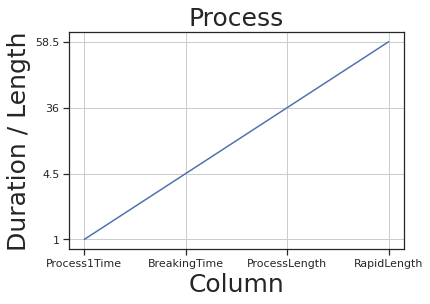

In [111]:
# I chose to use this graph as it highlights the huge differences in processes 

x_axis = ['Process1Time', 'BreakingTime', 'ProcessLength', 'RapidLength']
y_axis = ['1', '4.5', '36', '58.5']

ESAB_df = pd.DataFrame(ESAB_df)
plt.plot(x_axis, y_axis)
plt.title('Process', fontsize=25)
plt.xlabel('Column', fontsize=25)
plt.ylabel('Duration / Length', fontsize=25)
plt.grid(True)
plt.show()

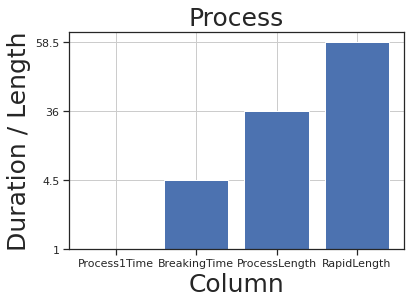

In [112]:
# Implemented this style of graph, for me it's the easiest to look at and quickly digest information

x_axis = ['Process1Time', 'BreakingTime', 'ProcessLength', 'RapidLength']
y_axis = ['1', '4.5', '36', '58.5']

plt.bar(x_axis, y_axis)
plt.title('Process', fontsize=25)
plt.xlabel('Column', fontsize=25)
plt.ylabel('Duration / Length', fontsize=25)
plt.grid(True)
plt.show()

In [113]:
# At this stage I decided to split my data set into two groups 
# Although above graphs are great for showing the scale of differences between processes
# It's not fair to compare time against distance 
# To that end, I have split the data set into two groups. Time group and distance group 
# This will far better aid in highlighting where nesting inefficientcies are

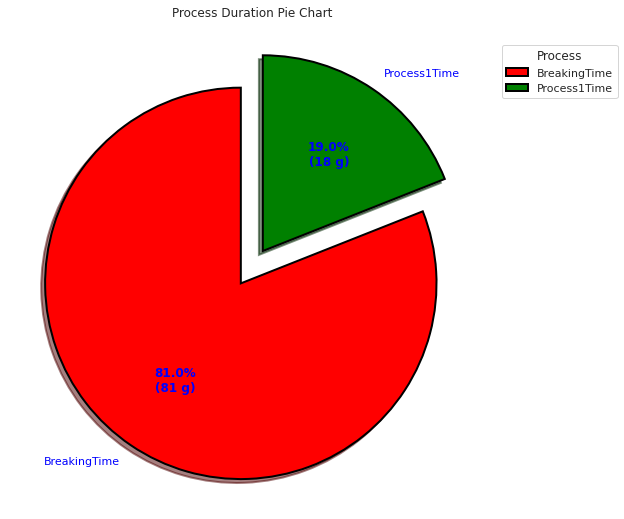

In [114]:
# After researching online and trialing multiple varients of graphs and charts I settled on this pie chart as my favourite
# It works very well with the data set I'm investigating

# Looking at, and comparing 'BreakingTime' vs. 'ProcessTime'
# Clearly shows the stark correllation between time spent cutting and time spent breaking
# Results are startling
    

Process = ['BreakingTime', 'Process1Time']
 
data = [81, 19]
 
explode = (0.1, 0.1,)
 
colors = ( 'Red', 'Green',)    
 
wp = { 'linewidth' : 2, 'edgecolor' : 'Black' }
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(12, 9))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = Process,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ='Blue'))
 
ax.legend(wedges, Process,
          title ='Process',
          loc ="center left",
          bbox_to_anchor =(1, 0.4, 5, 1))
 
plt.setp(autotexts, size = 12, weight ='bold')
ax.set_title('Process Duration Pie Chart')
 
plt.show()

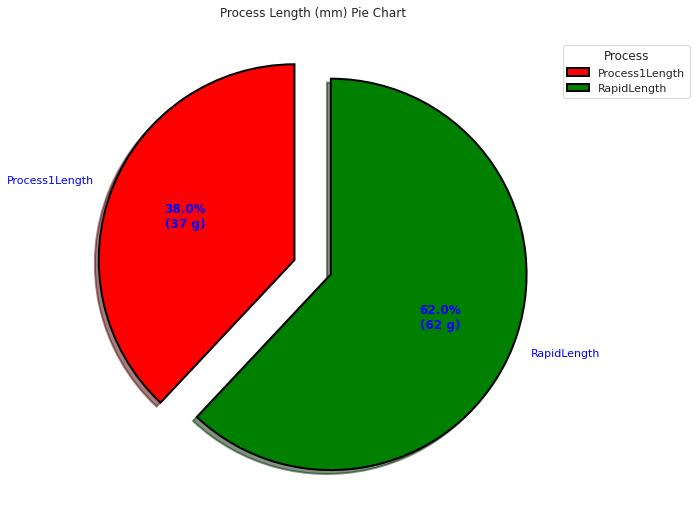

In [115]:
# Using the same pie chart as above
# This time looking at, and comparing 'Process1Length' vs. 'RapidLength'
# Again this is a great way of clearly displaying differences
# Results are again surprising and highlight areas in need of much improvement

Process = ['Process1Length', 'RapidLength']
 
data = [38, 62]
 
explode = (0.1, 0.1,)
 
colors = ( 'Red', 'Green',)    
 
wp = { 'linewidth' : 2, 'edgecolor' : 'Black' }
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
fig, ax = plt.subplots(figsize =(12, 9))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = Process,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ='Blue'))
 
ax.legend(wedges, Process,
          title ='Process',
          loc ="center left",
          bbox_to_anchor =(1, 0.4, 5, 1))
 
plt.setp(autotexts, size = 12, weight ='bold')
ax.set_title('Process Length (mm) Pie Chart')
 
plt.show()

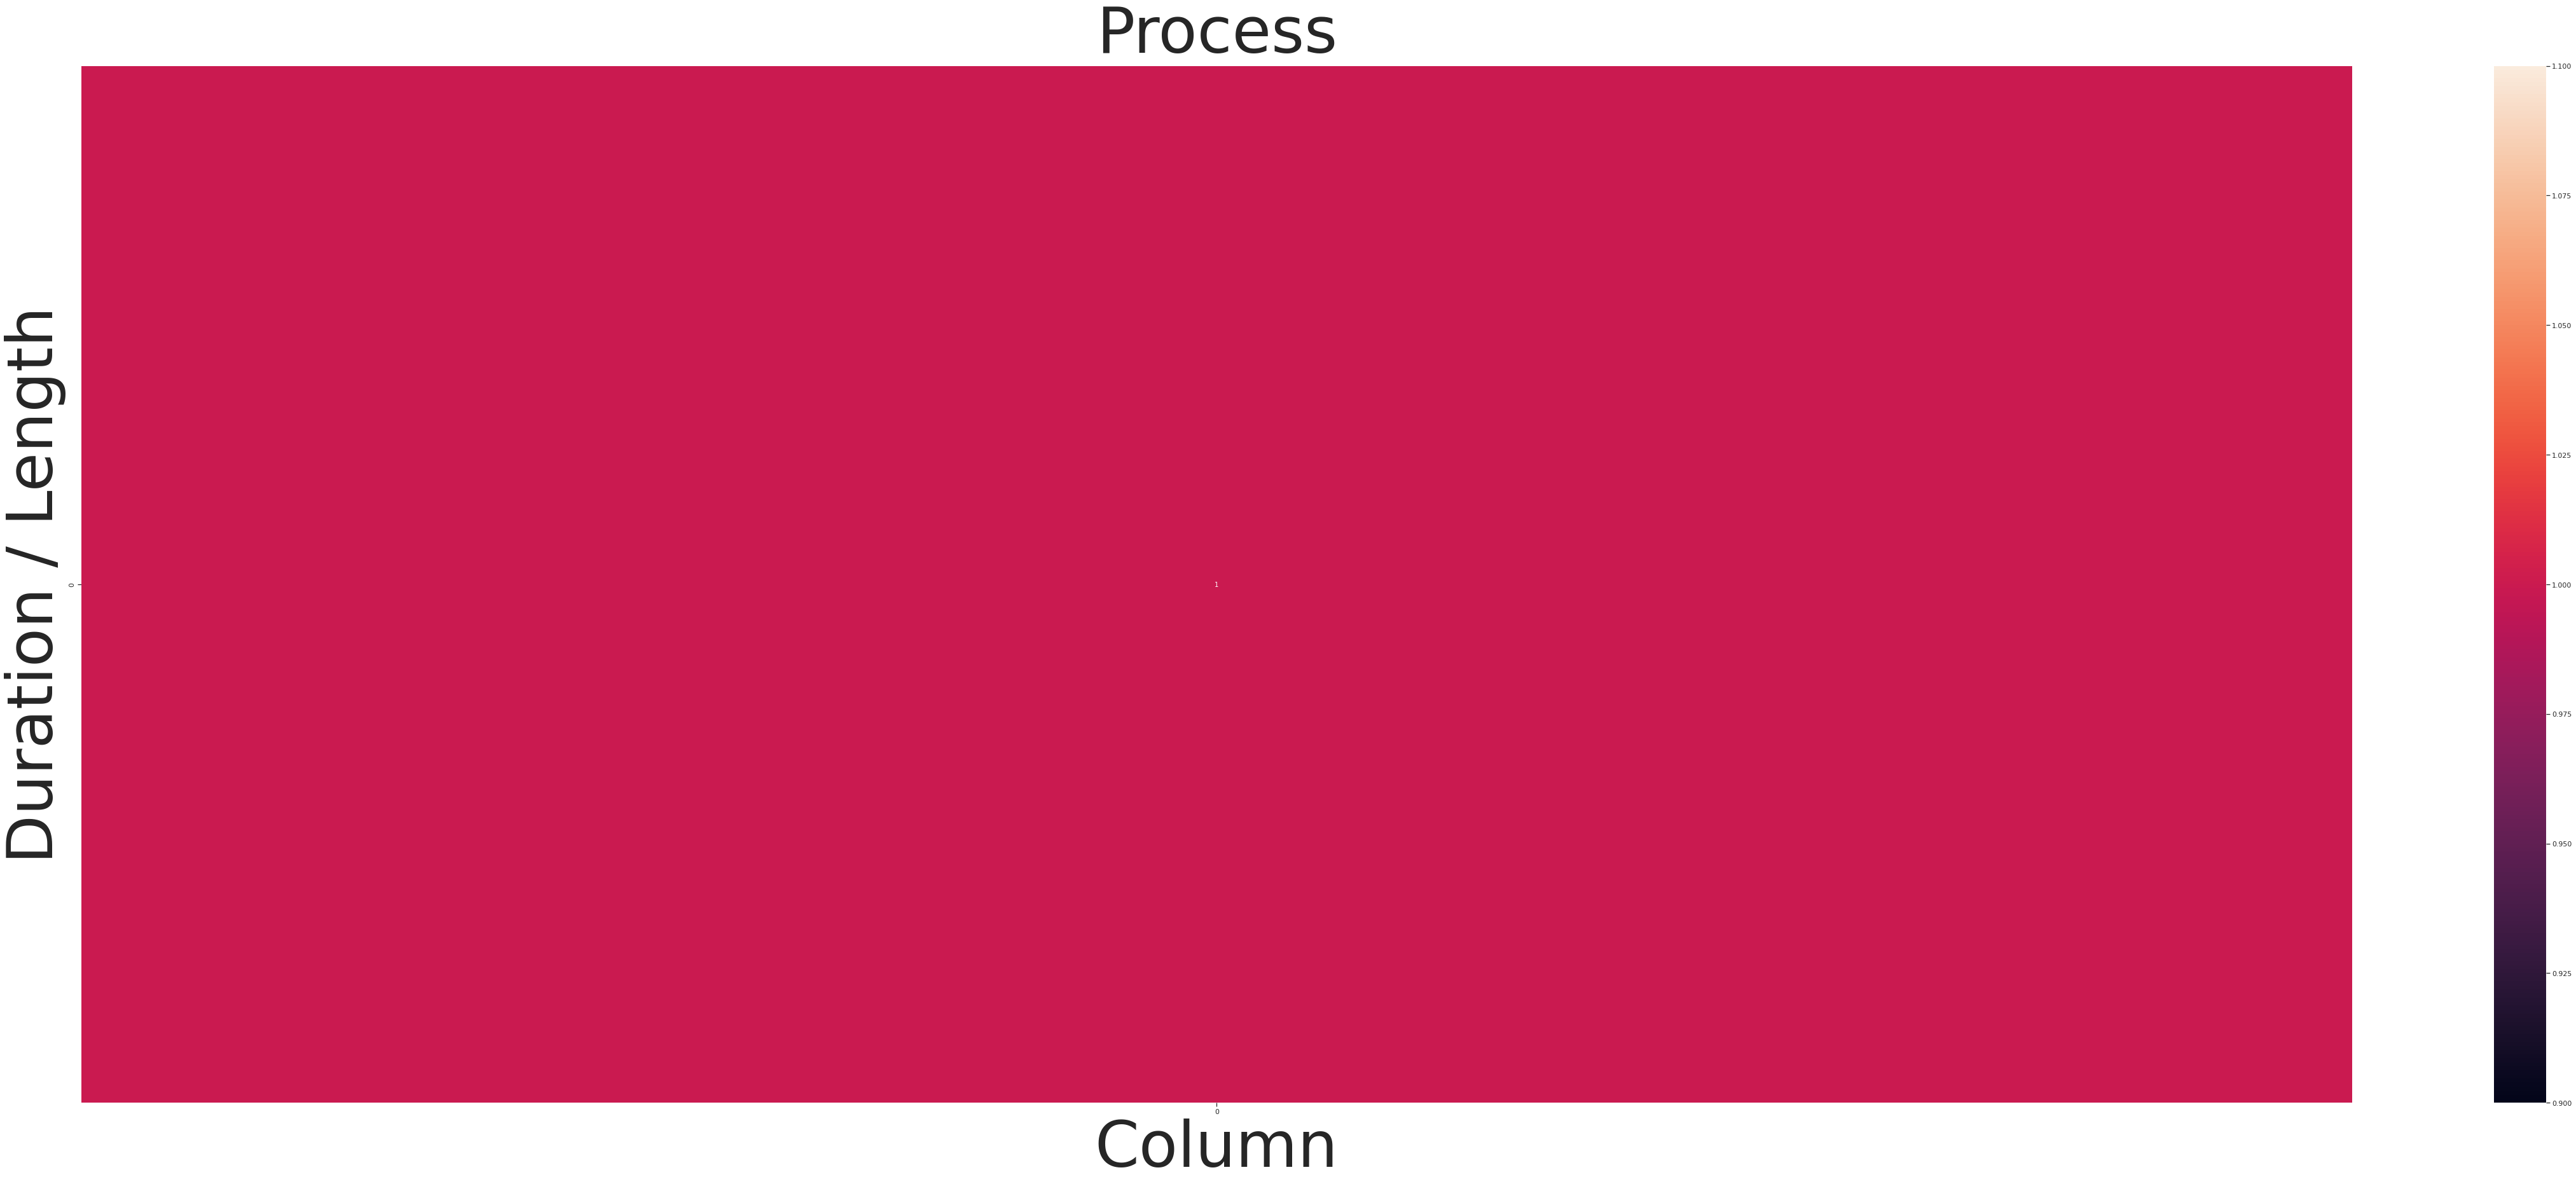

In [116]:
# Determing graph size

plt.figure(figsize=(80,30))

# Could not get this Heatmap to display correclty, spent hours on this but couldn't get it to work
# Will request feedback from course lecturers on where I'm going wrong
# Below attempt at least shows my intent

ESAB_df = pd.DataFrame(data)

heatplot = ax.imshow(ESAB_df,cmap = 'BuPu')

ESAB_df = ESAB_df.corr()
sns.heatmap(ESAB_df, annot=True)
sns.set_theme(style='ticks')
plt.xlabel('Column', fontsize=100)
plt.title('Process', fontsize=100)
plt.ylabel('Duration / Length', fontsize=100)
plt.show()

# Step_8 Conclusion

In [117]:
# This data set has been facinating to work through 
# With the data set being my own (Babcocks) all the information I was able to pull from it really makes sense 

# This evaluation of the ESAB machine over the course of a four week duration has been invaluable 
# Many areas in the Program life cycle on the ESAB have been highlighted and need to be revisited
# With the findings provided it better places me to know what to target and go after
# Findings will allow me to streamline processes, shave time and better understand resource 

# There are many features within the machine that we do not have enabled, these features are listed below...
#                                                    InkJet Station run time
#                                                    Injet Station linear distance travelled
#                                                    Text Marking Station run time
#                                                    Text Marking Station linear distance travelled
#                                                    Vaccum Blast Station run time
#                                                    Vaccum Blast Station linear distance travelled

# Above features were displayed in the original ESAB_df.csv data set before I started the cleaing process
# I deleted all columns that would have contained this information as they all contained no values 
# To enalbe said columns with usable data a software update to the machine is required
# This update is supplied by the machine tool vendor at a cost 
# As a business unit we were reluctant to purchase this upgrade as we didn't understand it's value
# With the learning achieved through this course and the study completed in this document I now understand it's value
# I'm now in a comfortable position to create a business justification to procure said software update
# I can use this document as the fundations of the business case


# Initial things to further investigate, understand, and streamline are listed below...
     # Removing completed parts from the machine bed is accountable for 81% of time
     # Program run time when the Plasma Torch is cutting is only accountable for 19% of time
# Suggest we look at better ways of removing parts from the machine bed       
# We need to drive program run time up and part removal time down

     # The distance travelled by the Plasma Torch whilst cutting is accountable for 38% of total distance travelled
     # Distance travelled by the Plasma Torch when NOT cutting is accountable for 62% of distance travelled
# We must look at nesting strategies to reduce Plasma Torch travel time when not cutting
# All moves made when not cutting are fresh air moves and not adding value to the product
# Fresh air moves can be drastically reduced by re-sequencing nest movements 
# Thus spending more time cutting steel and less time traversing in fresh air
# The knock on effect of this is overall nesting times are reduced and efficiencies increased 
# Ultimately this all works towords increasing our cut steel weight which is the Program goal

# Other things to note, we can determine how many Nests were successfully ran during studied time frame
# Number of Nests successfully completed was 94 in Number
# This can now be measured against, thus tracking trends and improvements in efficiency

